<a href="https://colab.research.google.com/github/njspyx/421-final-project/blob/main/CMSC421_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CMSC421 Final Project
Team Members: Jordan Maggin, Lex Kim, Zhuo Cheng Xie, Neel Jay, Hylene Wu

Project Description: The program will train on the set of images and gather information on airplanes from these images. With this information, it will attempt to both locate and identify airplanes in different sets of videos.


Installing YOLO

In [ ]:
!nvidia-smi

Sun May  5 16:58:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image


Importing dataset from Roboflow Project

In [ ]:
import os
root_dir = os.getcwd()
!mkdir {root_dir}/datasets
%cd {root_dir}/datasets

# paste the exported dataset code here
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="nr1RFEWRZXe3o3eQV1ns")
project = rf.workspace("cmsc421-final-project").project("vehicle-detection-ansgq")
version = project.version(1)
dataset = version.download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicle-Detection-1 in yolov8:: 100%|██████████| 13426/13426 [00:02<00:00, 4853.98it/s]


Custom Training

(Weights are saved to /content/runs/detect/train)

In [5]:
%cd {root_dir}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 242MB/s]
New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Vehicle-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre

Resulting Confusion Matrix

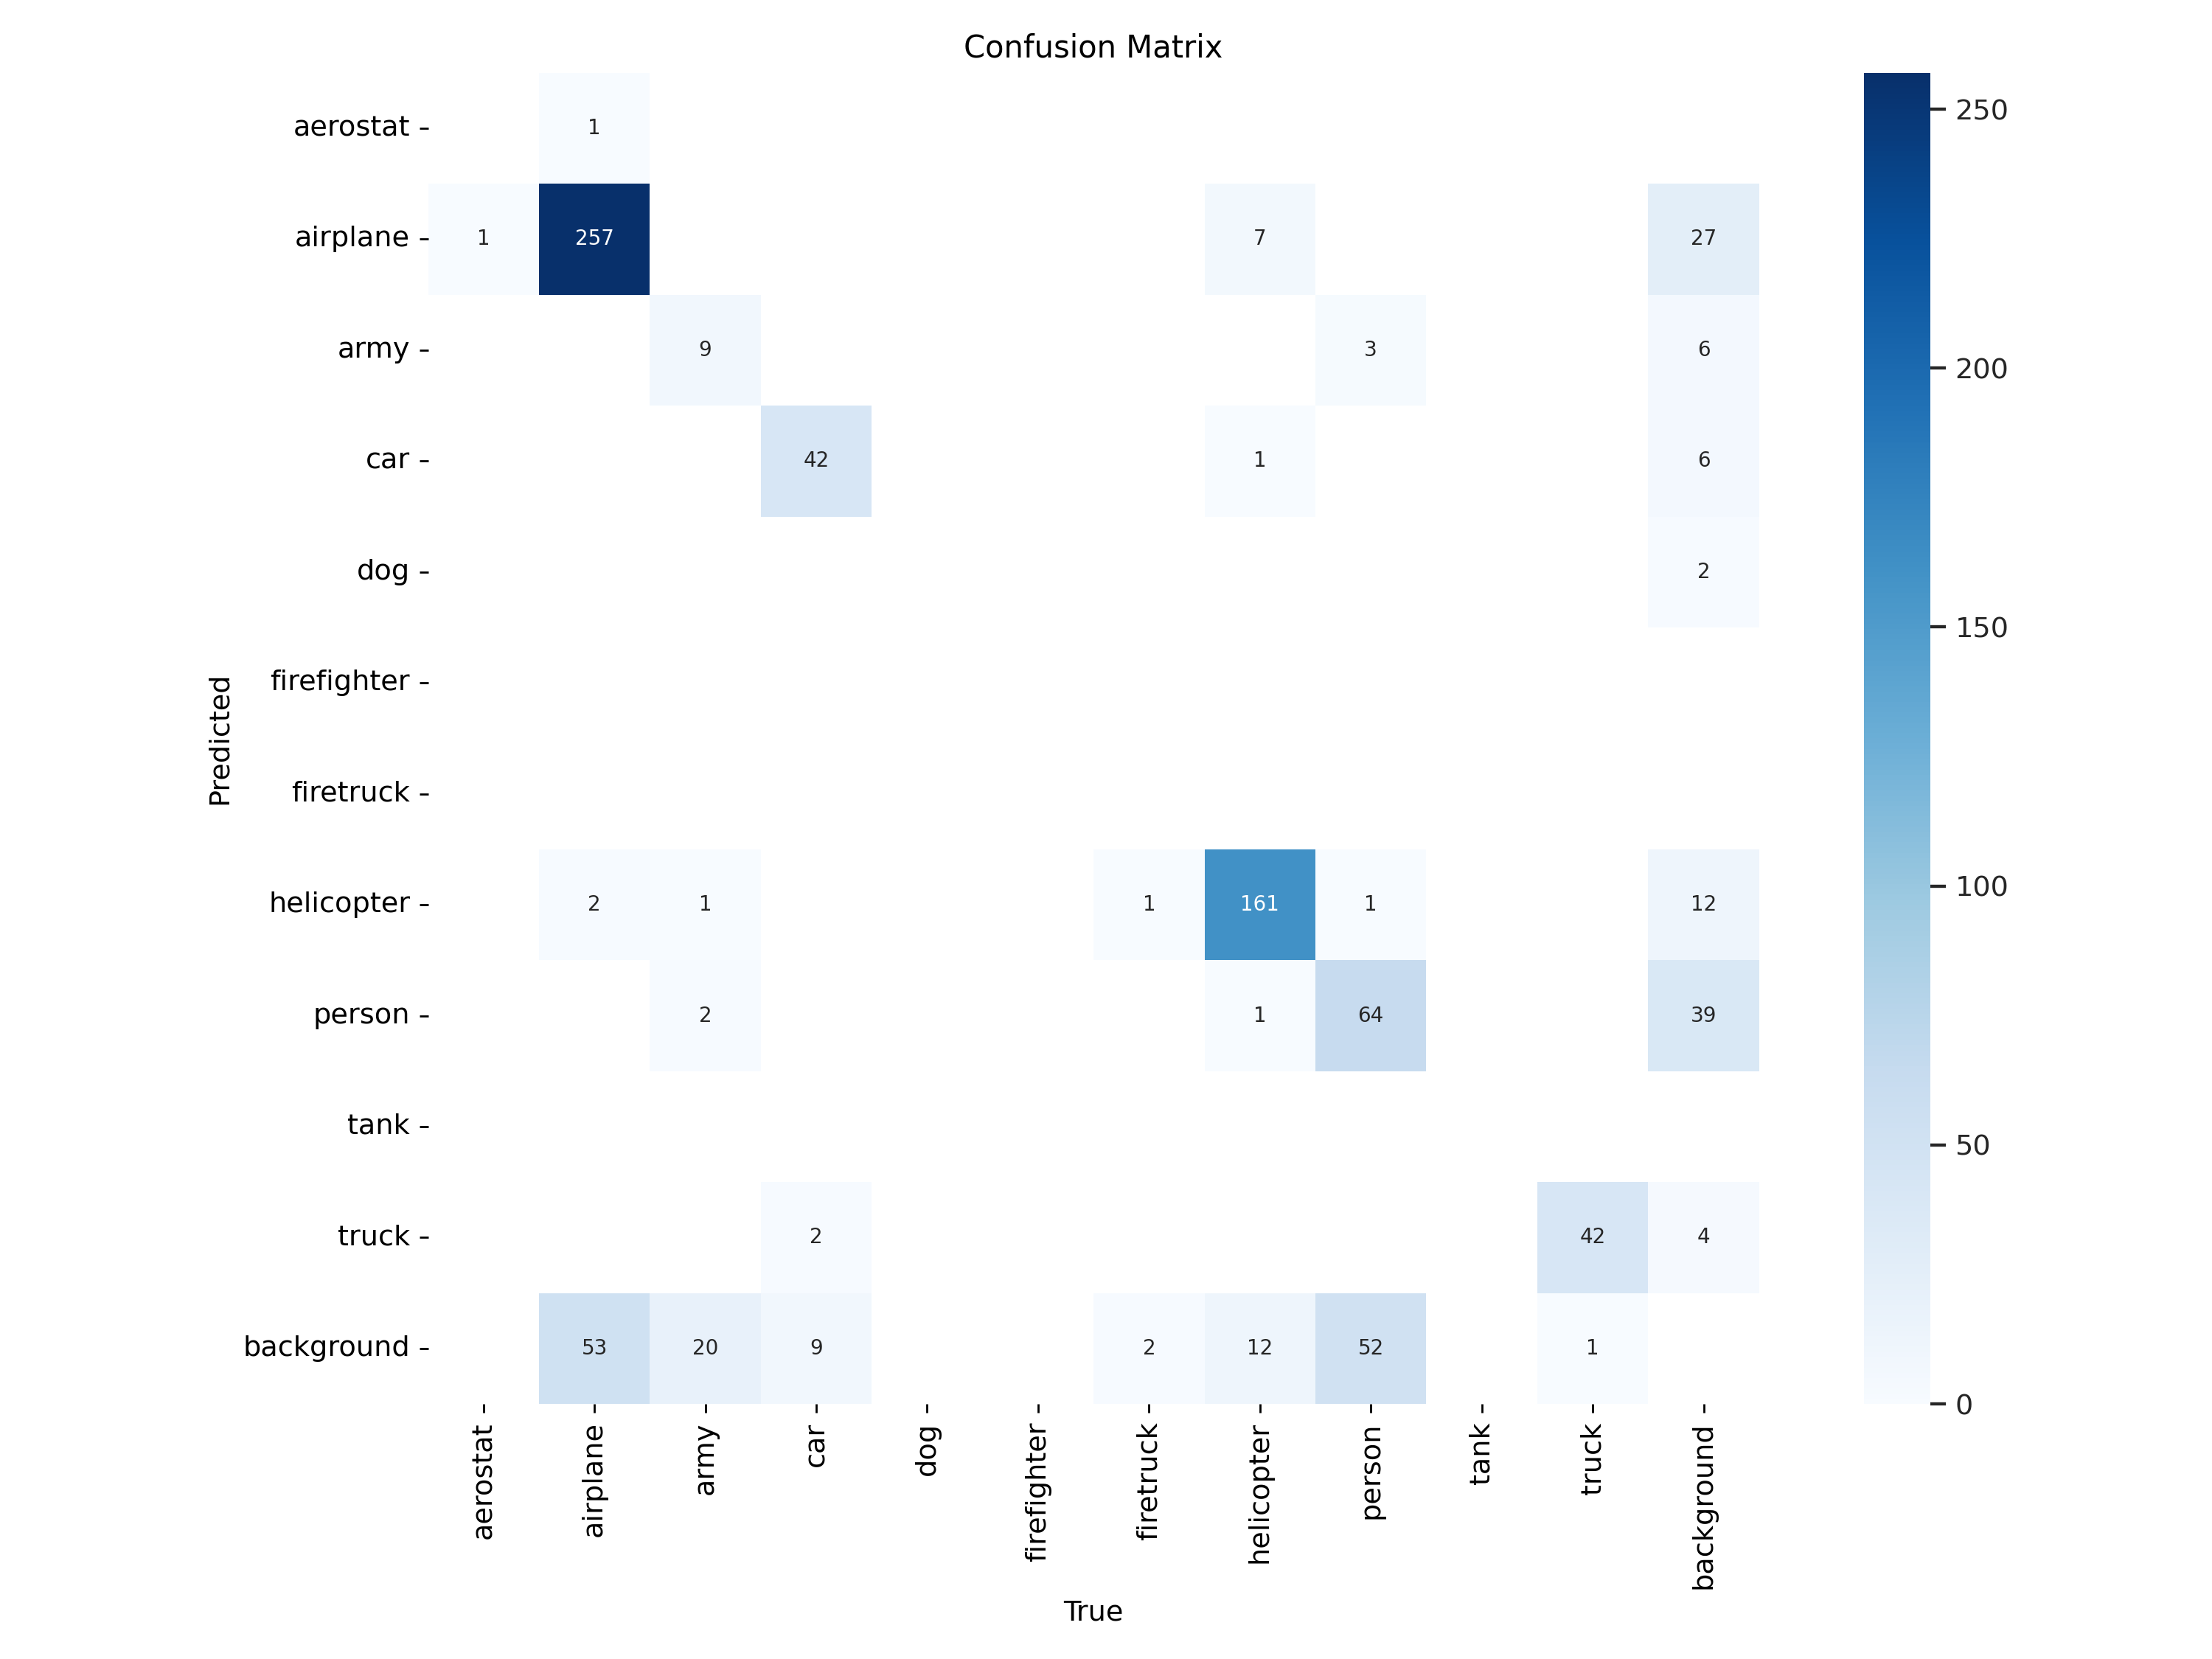

In [7]:
Image(filename=f'{root_dir}/runs/detect/train/confusion_matrix.png', width=600)

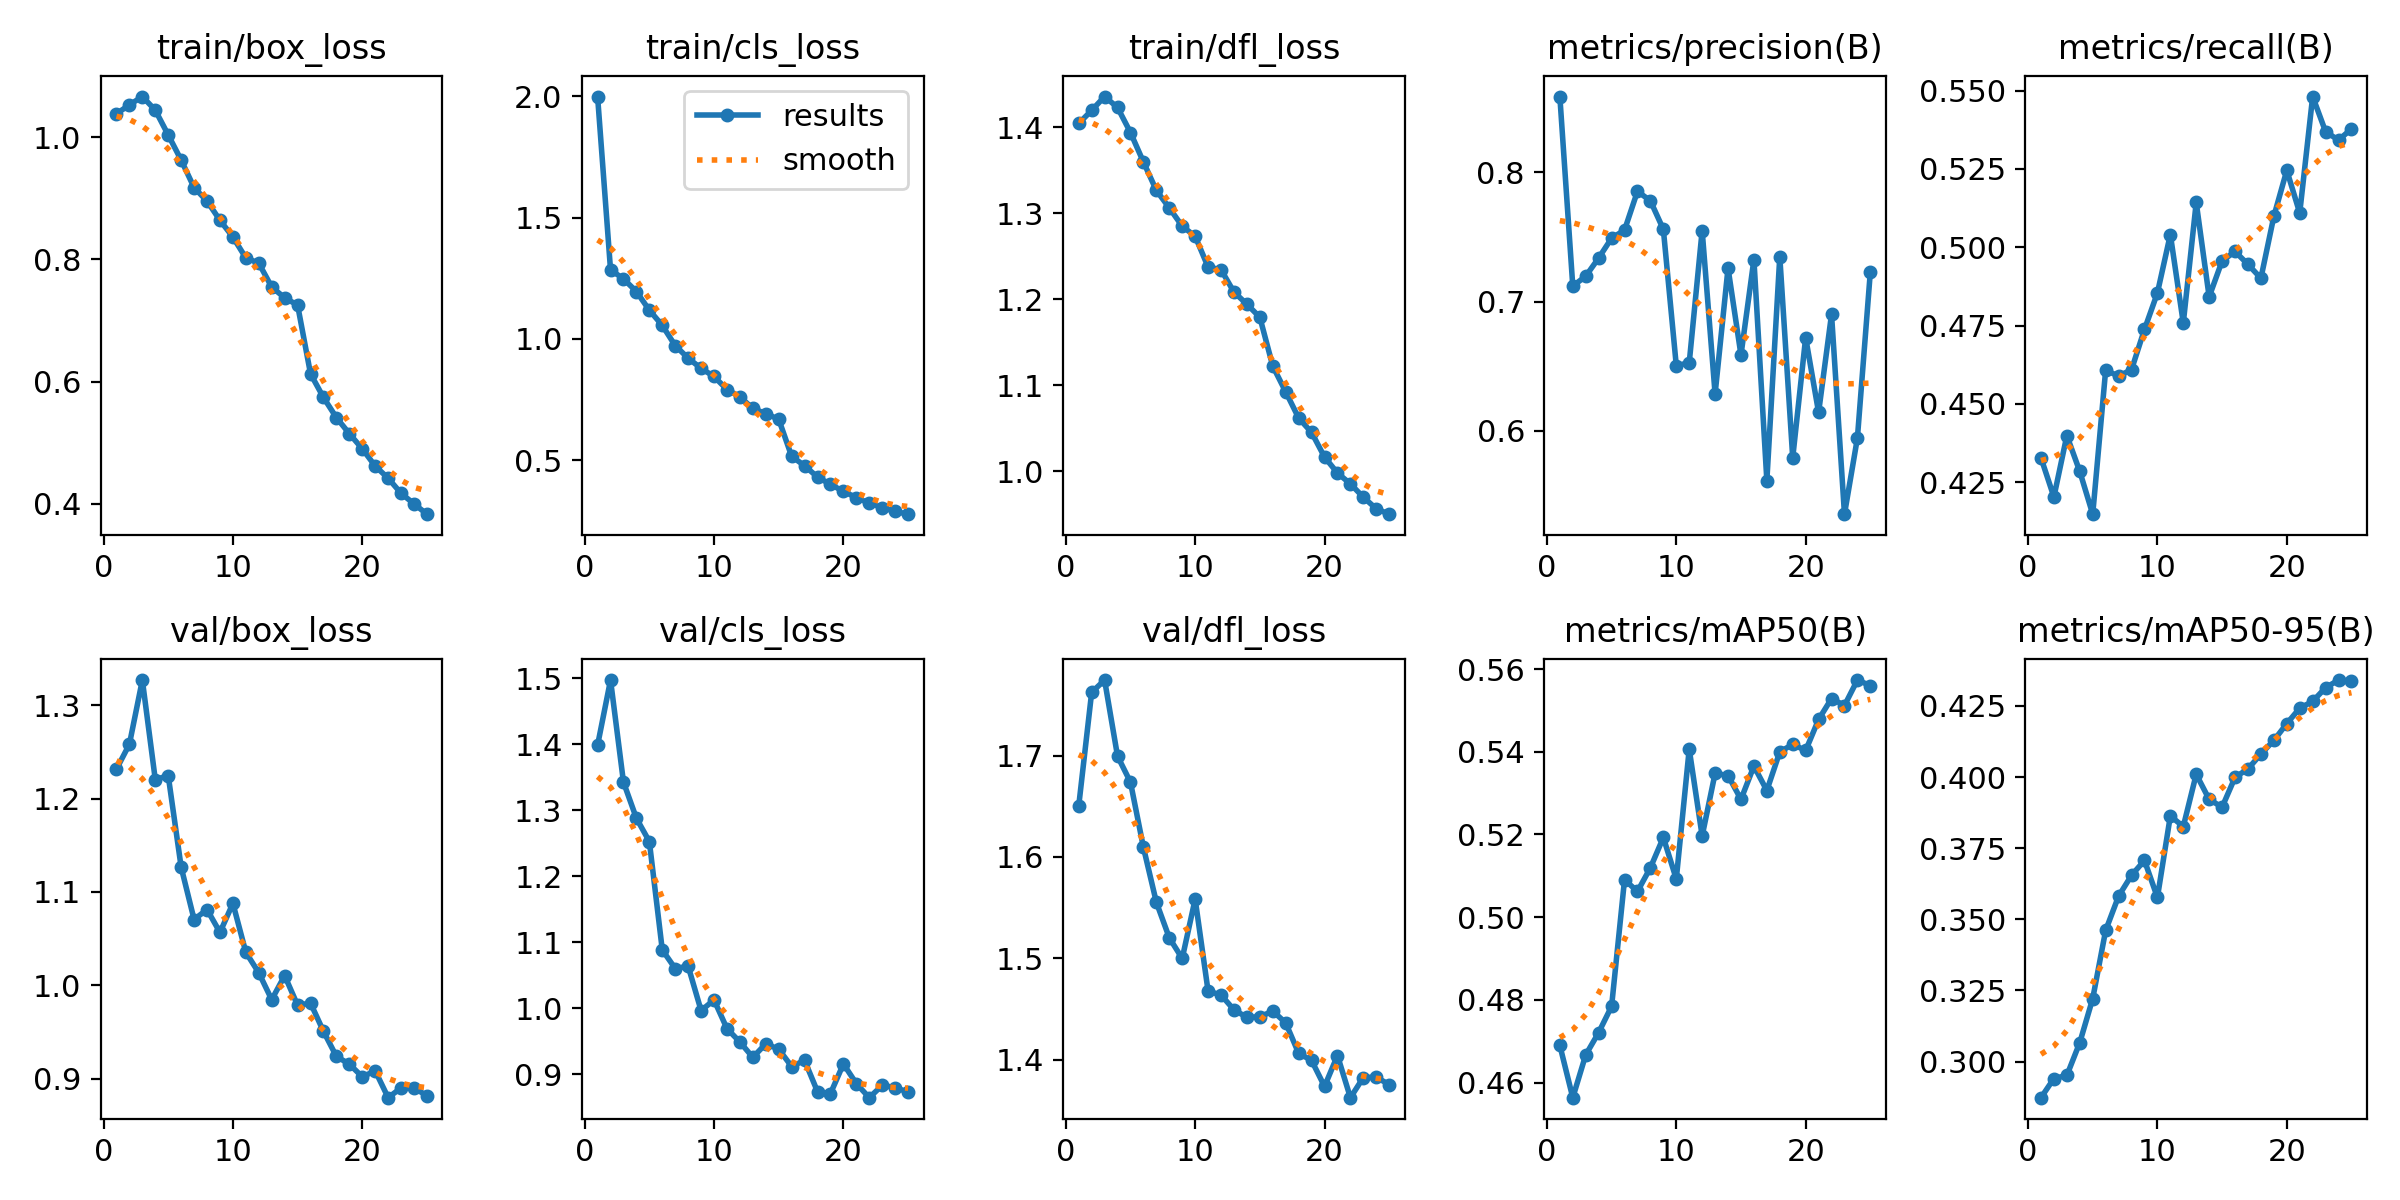

In [9]:
Image(filename=f'{root_dir}/runs/detect/train/results.png', width=600)

Validate model

In [10]:
!yolo task=detect mode=val model={root_dir}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Vehicle-Detection-1/valid/labels.cache... 479 images, 0 backgrounds, 0 corrupt: 100% 479/479 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 30/30 [00:09<00:00,  3.14it/s]
                   all        479        747      0.595      0.534      0.558      0.436
              aerostat        479          1          0          0     0.0553     0.0387
              airplane        479        313      0.887      0.815      0.856      0.694
                  army        479         32      0.562       0.

Inference/Predict with Model

In [11]:
!yolo task=detect mode=predict model={root_dir}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs

image 1/222 /content/datasets/Vehicle-Detection-1/test/images/00000018_jpg.rf.40f13a2e9bd82a1b35bcc648759bef05.jpg: 640x640 1 helicopter, 16.4ms
image 2/222 /content/datasets/Vehicle-Detection-1/test/images/00000020_jpg.rf.4a175811ebf401c900e8635a4e70995d.jpg: 640x640 1 airplane, 2 helicopters, 16.4ms
image 3/222 /content/datasets/Vehicle-Detection-1/test/images/00000022_jpg.rf.f753e26f44c828af0e0df577db86079f.jpg: 640x640 1 airplane, 16.3ms
image 4/222 /content/datasets/Vehicle-Detection-1/test/images/00000023_jpg.rf.4d81a8976a353540fcb7e78a5629ff1c.jpg: 640x640 1 car, 1 helicopter, 16.3ms
image 5/222 /content/datasets/Vehicle-Detection-1/test/images/00000038_jpg.rf.58365d5e9172b0969bb066adf98298b1.jpg: 640x640 1 helicopter, 16.4ms
image 6/222 /content/datasets/Vehicle-Detection-1/test/images/00000041_jpg.rf.31c7ce427

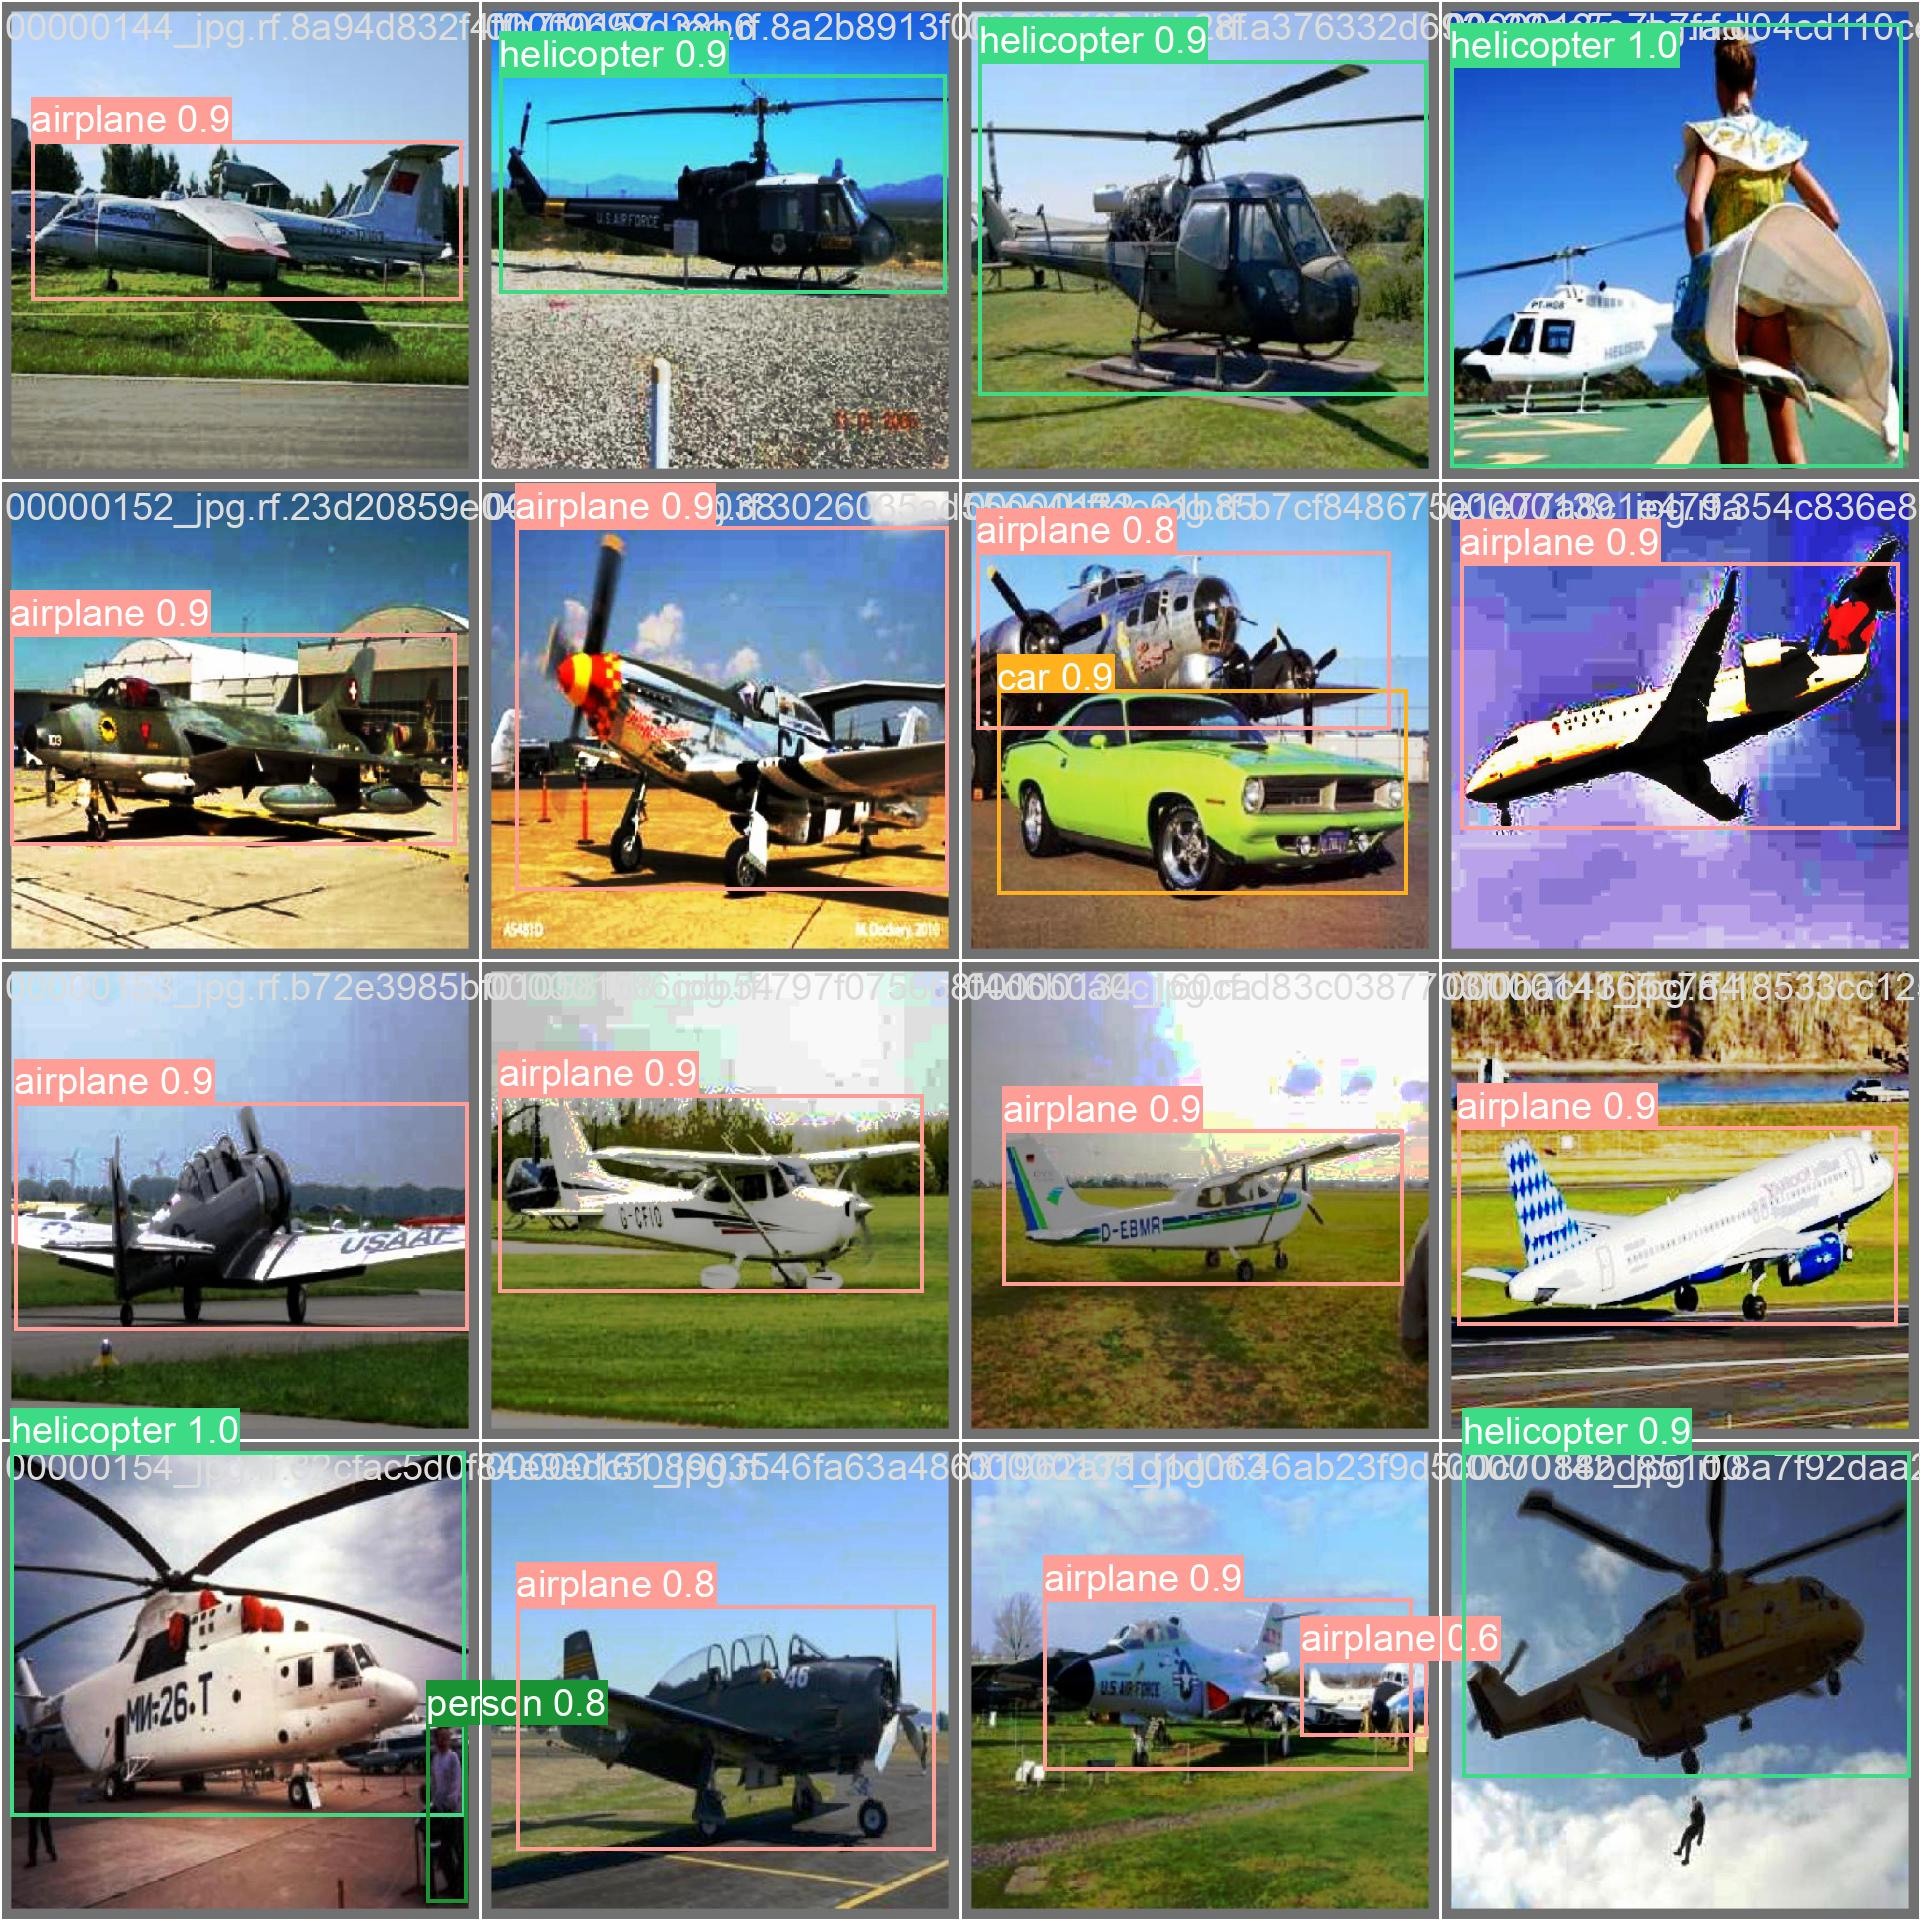

In [14]:
Image(filename=f'{root_dir}/runs/detect/train/val_batch2_pred.jpg', width=600)

Deploying to Roboflow

In [15]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{root_dir}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/cmsc421-final-project/vehicle-detection-ansgq/1
Share your model with the world at: https://universe.roboflow.com/cmsc421-final-project/vehicle-detection-ansgq/model/1
